Coursera Machine Learning EX1
================

## Univariate Linear Regression

Import some modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Define functions for linear regression

In [2]:
def computeCost(X, y, theta):
    m = y.size
    diff = np.dot(X, theta).reshape(-1) - y
    return np.vdot(diff, diff) / (2 * m)

In [45]:
def gradientDescent(X, y, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    theta = np.zeros(X.shape[1]) # initialize fitting parameters

    for idx in xrange(num_iters): # np.nditer(J_history, op_flags=['readwrite']):
        '''
        Instructions: Perform a single gradient step on the parameter vector
                      theta. 
                      
        
        Hint: While debugging, it can be useful to print out the values
              of the cost function (computeCost) and gradient here.
        '''
        diff = (np.dot(X, theta).reshape(-1) - y).reshape((m,1))
        theta = theta - (alpha/m) * np.dot(X.T, diff).reshape(-1) # np.dot(diff.T, X).T
        
        # Save the cost J in every iteration    
        J_history[idx] = computeCost(X, y, theta)
        
    return theta, J_history

Exercise Code

Plotting Data ...


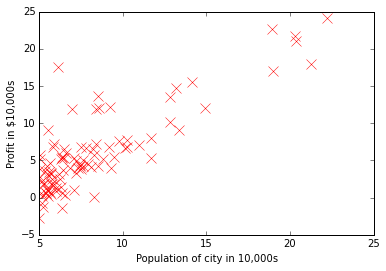

Running Gradient Descent ...
(2,)
Theta found by gradient descent: 
[-3.63029144  1.16636235]


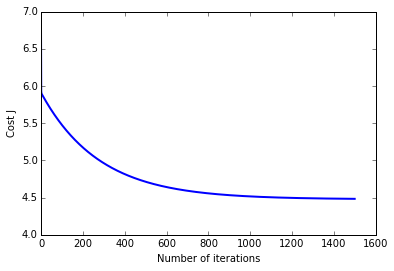

In [29]:
print 'Plotting Data ...'
data = np.loadtxt('datasets/ex1data1.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]
m = y.size # number of training examples

plt.plot(X, y, 'rx', markersize=10)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of city in 10,000s')
plt.show()

print 'Running Gradient Descent ...'

X = (np.vstack((np.ones(m), X))).T # add ones, and transpose to (m by 2)
#theta = np.zeros((2, 1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# compute and display initial cost
#print computeCost(X, y, theta)

# run gradient descent
theta, J_history = gradientDescent(X, y, alpha, iterations)

# print theta to screen
print 'Theta found by gradient descent: '
print theta

# Plot the convergence graph
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.plot(xrange(iterations), J_history, '-b', linewidth=2);
plt.show()

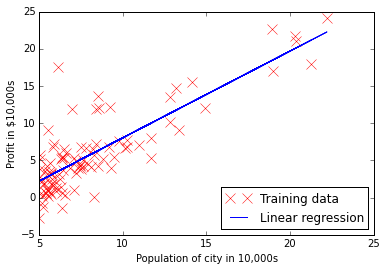

For population = 35,000, we predict a profit of  4519.7678677
For population = 70,000, we predict a profit of  45342.4501294


In [30]:
# Plot the linear fit
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of city in 10,000s')
plt.plot(X[:,1], y, 'rx', markersize=10, label='Training data')
plt.plot(X[:,1], np.dot(X, theta).reshape(-1), '-', label='Linear regression')
plt.legend(loc='lower right')
plt.show()

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.vdot(np.array([1, 3.5]), theta)
print 'For population = 35,000, we predict a profit of ', predict1*10000
predict2 = np.vdot(np.array([1, 7]), theta)
print 'For population = 70,000, we predict a profit of ', predict2*10000

## Multivariate Linear Regression

Define functions for linear regression

In [36]:
def featureNormalize(X_in):
    # ====================== YOUR CODE HERE ======================
    # Instructions: First, for each feature dimension, compute the mean
    #               of the feature and subtract it from the dataset,
    #               storing the mean value in mu. Next, compute the 
    #               standard deviation of each feature and divide
    #               each feature by it's standard deviation, storing
    #               the standard deviation in sigma. 
    #
    #               Note that X is a matrix where each column is a 
    #               feature and each row is an example. You need 
    #               to perform the normalization separately for 
    #               each feature. 
    #
    # Hint: You might find the 'mean' and 'std' functions useful.
    #

    mean = np.mean(X_in, axis=0)
    mu = np.tile(mean, (X_in.shape[0], 1))
    sigma = np.tile(np.std(X_in, axis=0), (X_in.shape[0], 1))
    
    X_norm = X_in - mu
    X_norm = X_norm / sigma
    
    return (X_norm, mu[0, :], sigma[0, :])

Normalize the features

In [37]:
print 'Loading data ...'

# Load Data
data = np.loadtxt('datasets/ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
m = y.size

# Print out some data points
print 'First 10 examples from the dataset:'
print 'x = \n', X[0:10,:]
print 'y = \n', y[0:10]

# Scale features and set them to zero mean
print 'Normalizing Features ...'

# X, mu, sigma
X, mu, sigma = featureNormalize(X)

# Add intercept term to X
X = (np.hstack((np.ones((m, 1)), X)))

print 'mu = ', mu, ', sigma = ', sigma

Loading data ...
First 10 examples from the dataset:
x = 
[[  2.10400000e+03   3.00000000e+00]
 [  1.60000000e+03   3.00000000e+00]
 [  2.40000000e+03   3.00000000e+00]
 [  1.41600000e+03   2.00000000e+00]
 [  3.00000000e+03   4.00000000e+00]
 [  1.98500000e+03   4.00000000e+00]
 [  1.53400000e+03   3.00000000e+00]
 [  1.42700000e+03   3.00000000e+00]
 [  1.38000000e+03   3.00000000e+00]
 [  1.49400000e+03   3.00000000e+00]]
y = 
[ 399900.  329900.  369000.  232000.  539900.  299900.  314900.  198999.
  212000.  242500.]
Normalizing Features ...
mu =  [ 2000.68085106     3.17021277] , sigma =  [  7.86202619e+02   7.52842809e-01]


Running gradient descent ...
(3,)


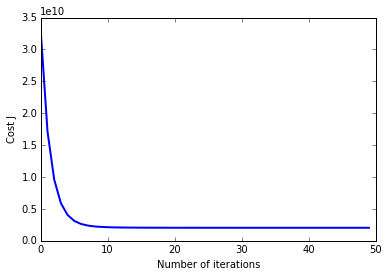

Theta computed from gradient descent:
[ 340412.65345227  109398.90129361   -6529.45967813]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 293092.212731


In [44]:
print 'Running gradient descent ...'

# Choose some alpha value
alpha = 0.3;
num_iters = 50;

# Init Theta and Run Gradient Descent 
theta, J_history = gradientDescent(X, y, alpha, num_iters);

# Plot the convergence graph
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.plot(xrange(num_iters), J_history, '-b', linewidth=2);
plt.show()

# Display gradient descent's result
print 'Theta computed from gradient descent:\n', theta

# Estimate the price of a 1650 sq-ft, 3 br house
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.

test = (np.array([1650, 3]) - mu) / sigma
price = np.vdot(np.hstack((np.array([1]), test)), theta)

print 'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):', price